In [5]:
# Bibliotecas para poder realizar análises estatísticas e visualizações de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Estadistica inferencial

La estadistica inferencial permite estimar propiedades de una poblacion a partir de una muestra aleatoria de una poblacion.

Continente: América
Altura media estimada: 170.88 cm
Intervalo de confianza del 95%: (169.61, 172.15) cm



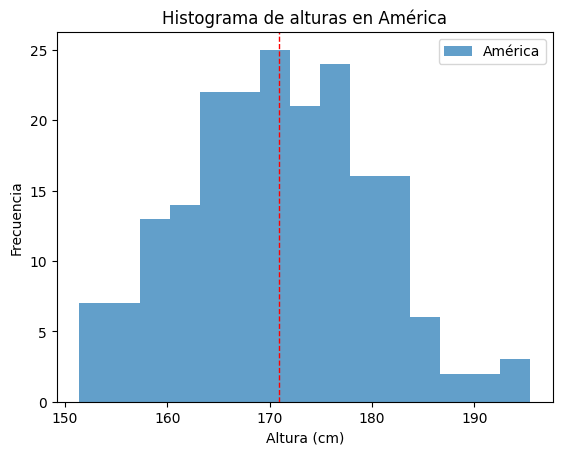

Continente: Europa
Altura media estimada: 169.16 cm
Intervalo de confianza del 95%: (167.82, 170.51) cm



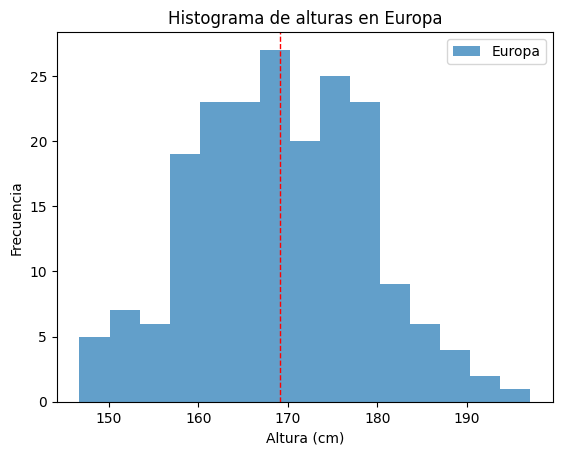

Continente: Asia
Altura media estimada: 169.68 cm
Intervalo de confianza del 95%: (168.24, 171.11) cm



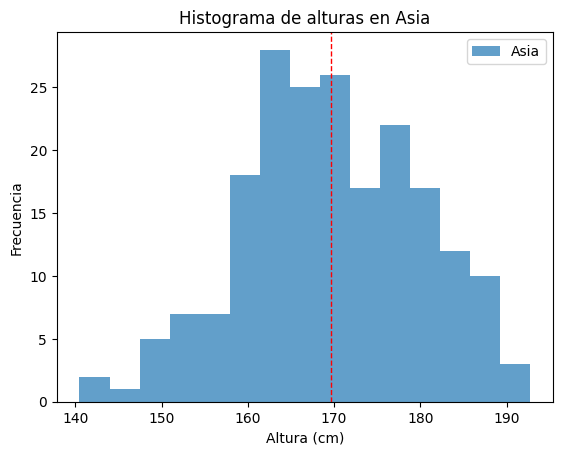

Continente: África
Altura media estimada: 169.16 cm
Intervalo de confianza del 95%: (167.76, 170.56) cm



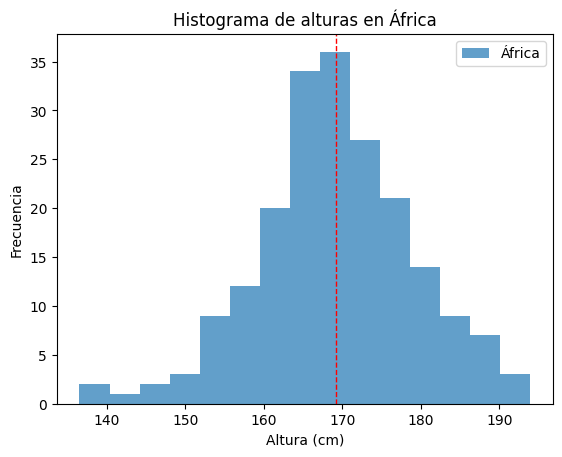

Continente: Oceanía
Altura media estimada: 169.22 cm
Intervalo de confianza del 95%: (167.91, 170.53) cm



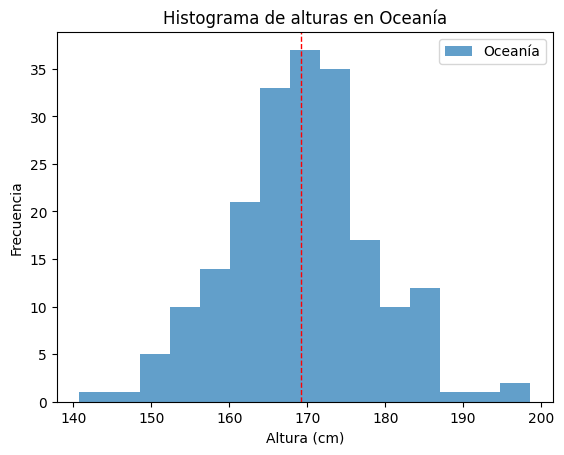

In [6]:
# Estimar la altura media de hombres de 18-30 años en el mundo 
# tomando muestras de 200 personas por continente

# Continentes y población simulada
continentes = ["América", "Europa", "Asia", "África", "Oceanía"]
poblacion = pd.DataFrame({"continente": np.random.choice(continentes, size=10000),
                           "edad": np.random.randint(18, 31, size=10000),
                           "altura": np.random.normal(loc=170, scale=10, size=10000)})

# Muestra de 200 personas por continente
for continente in continentes:
    muestra = poblacion[poblacion["continente"] == continente].sample(n=200, random_state=42)
    
    # Cálculo de la media y el intervalo de confianza del 95%
    media_muestra = muestra["altura"].mean()
    sem = stats.sem(muestra["altura"])
    intervalo_confianza = stats.t.interval(0.95, len(muestra)-1, loc=media_muestra, scale=sem)
    
    print(f"Continente: {continente}")
    print(f"Altura media estimada: {media_muestra:.2f} cm")
    print(f"Intervalo de confianza del 95%: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f}) cm\n")
    # Visualización
    plt.hist(muestra["altura"], bins=15, alpha=0.7, label=f'{continente}')
    plt.axvline(media_muestra, color='red', linestyle='dashed', linewidth=1)
    plt.title(f'Histograma de alturas en {continente}')
    plt.xlabel('Altura (cm)')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()  
    

# Distribucion normal(guassiana)

La **distribución normal** o **gaussiana** es una distribución de probabilidad continua que tiene forma de campana. Es una de las distribuciones más importantes en estadística.

DISTRIBUCIÓN NORMAL POR CONTINENTE

América:
  Media: 170.05 cm
  Desv. Std: 10.08 cm
  N° personas: 2007

Europa:
  Media: 170.22 cm
  Desv. Std: 10.02 cm
  N° personas: 1975

Asia:
  Media: 169.65 cm
  Desv. Std: 9.94 cm
  N° personas: 1980

África:
  Media: 169.97 cm
  Desv. Std: 10.25 cm
  N° personas: 2003

Oceanía:
  Media: 170.00 cm
  Desv. Std: 9.94 cm
  N° personas: 2035


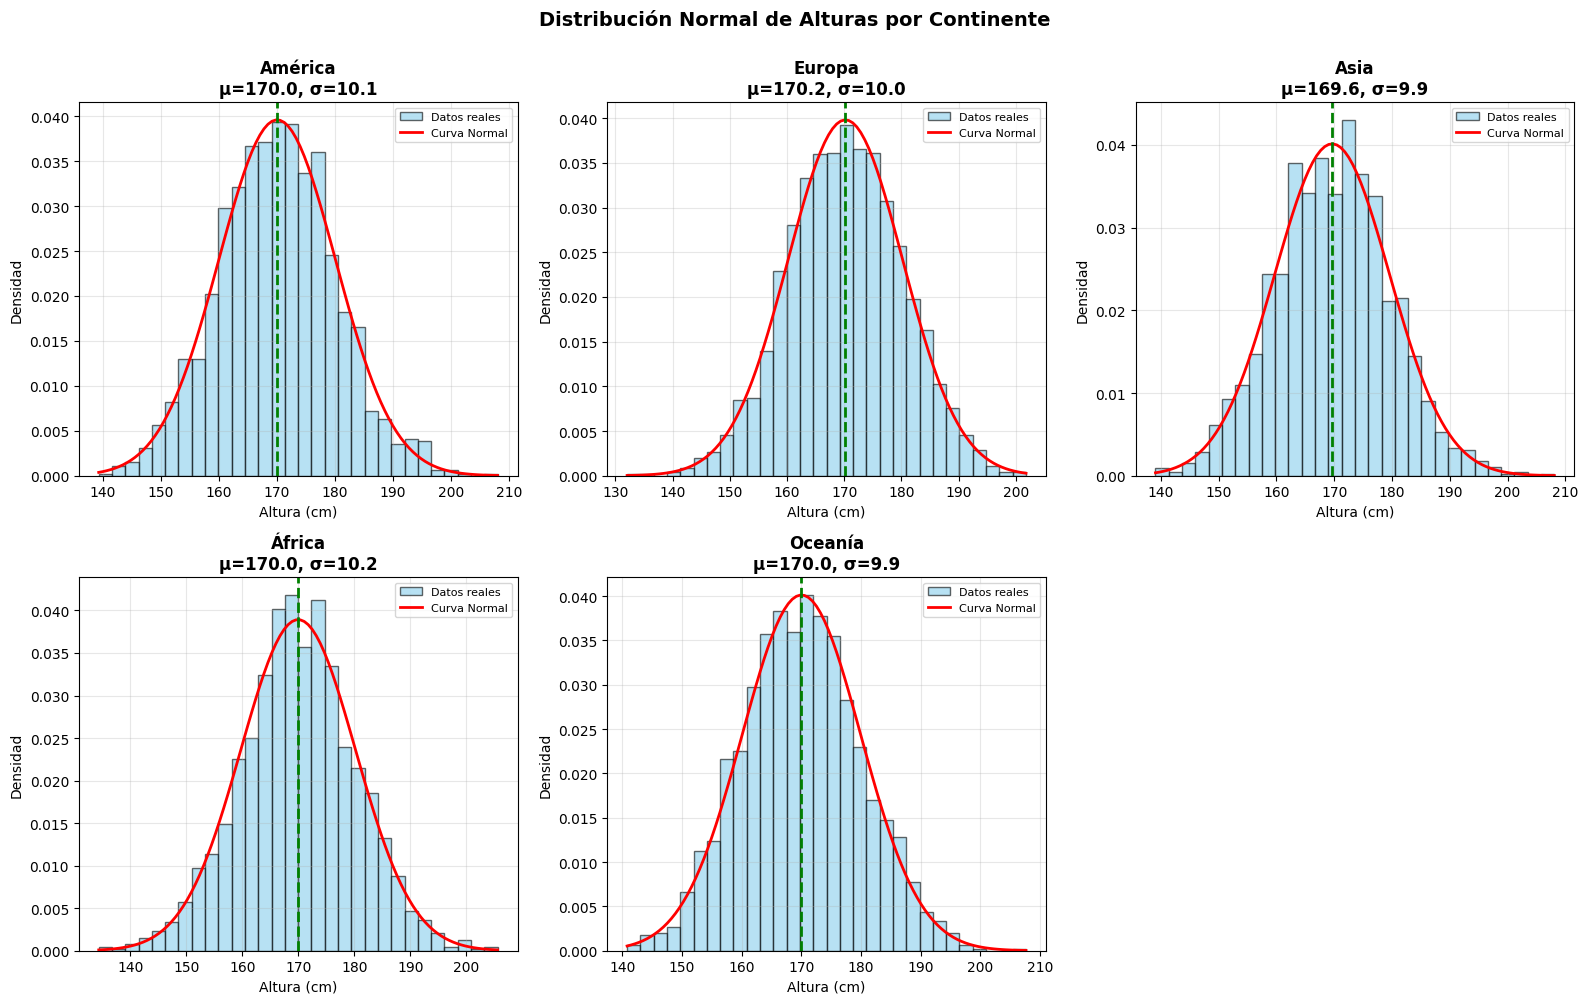

In [7]:
# Comparación de distribuciones normales por continente

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

print("="*60)
print("DISTRIBUCIÓN NORMAL POR CONTINENTE")
print("="*60)

for i, continente in enumerate(continentes):
    # Filtrar datos del continente
    datos_continente = poblacion[poblacion["continente"] == continente]["altura"]
    
    # Calcular parámetros
    media_cont = datos_continente.mean()
    std_cont = datos_continente.std()
    n_cont = len(datos_continente)
    
    print(f"\n{continente}:")
    print(f"  Media: {media_cont:.2f} cm")
    print(f"  Desv. Std: {std_cont:.2f} cm")
    print(f"  N° personas: {n_cont}")
    
    # Histograma
    axes[i].hist(datos_continente, bins=30, density=True, alpha=0.6, 
                 color='skyblue', edgecolor='black', label='Datos reales')
    
    # Curva normal
    x_cont = np.linspace(datos_continente.min(), datos_continente.max(), 100)
    curva = stats.norm.pdf(x_cont, media_cont, std_cont)
    axes[i].plot(x_cont, curva, 'r-', linewidth=2, label='Curva Normal')
    
    # Media
    axes[i].axvline(media_cont, color='green', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'{continente}\nμ={media_cont:.1f}, σ={std_cont:.1f}', 
                     fontweight='bold')
    axes[i].set_xlabel('Altura (cm)')
    axes[i].set_ylabel('Densidad')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

# Ocultar el último subplot
axes[5].axis('off')

plt.suptitle('Distribución Normal de Alturas por Continente', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


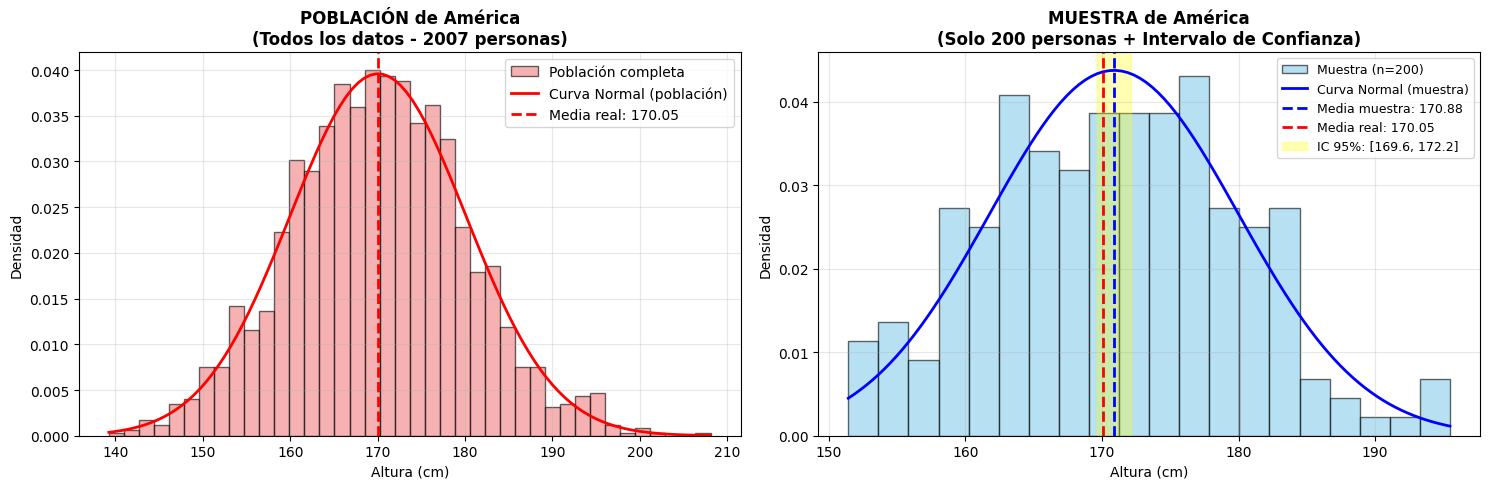

COMPARACIÓN: POBLACIÓN vs MUESTRA

                           POBLACIÓN         MUESTRA      DIFERENCIA
----------------------------------------------------------------------
Media                         170.05          170.88            0.84
Desv. Std                      10.08            9.12            0.96
Tamaño                          2007             200

VALIDACIÓN DEL INTERVALO DE CONFIANZA
Intervalo de confianza 95%: [169.61, 172.15] cm
Media poblacional real: 170.05 cm

✅ ¡ÉXITO! La media real SÍ está dentro del intervalo de confianza


In [8]:
# Demostración: Comparación población vs muestra (América)

continente_ejemplo = "América"
muestra_america = poblacion[poblacion["continente"] == continente_ejemplo].sample(n=200, random_state=42)
poblacion_america = poblacion[poblacion["continente"] == continente_ejemplo]

# Calcular parámetros
media_muestra = muestra_america["altura"].mean()
std_muestra = muestra_america["altura"].std()
media_poblacion_america = poblacion_america["altura"].mean()
std_poblacion_america = poblacion_america["altura"].std()

# Intervalo de confianza
sem = stats.sem(muestra_america["altura"])
ic = stats.t.interval(0.95, len(muestra_america)-1, loc=media_muestra, scale=sem)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Población completa de América
axes[0].hist(poblacion_america["altura"], bins=40, density=True, alpha=0.6,
             color='lightcoral', edgecolor='black', label='Población completa')
x_pob = np.linspace(poblacion_america["altura"].min(), poblacion_america["altura"].max(), 100)
axes[0].plot(x_pob, stats.norm.pdf(x_pob, media_poblacion_america, std_poblacion_america),
             'r-', linewidth=2, label='Curva Normal (población)')
axes[0].axvline(media_poblacion_america, color='red', linestyle='--', linewidth=2,
                label=f'Media real: {media_poblacion_america:.2f}')
axes[0].set_title(f'POBLACIÓN de {continente_ejemplo}\n(Todos los datos - {len(poblacion_america)} personas)',
                  fontweight='bold')
axes[0].set_xlabel('Altura (cm)')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Muestra e inferencia
axes[1].hist(muestra_america["altura"], bins=20, density=True, alpha=0.6,
             color='skyblue', edgecolor='black', label='Muestra (n=200)')
x_mues = np.linspace(muestra_america["altura"].min(), muestra_america["altura"].max(), 100)
axes[1].plot(x_mues, stats.norm.pdf(x_mues, media_muestra, std_muestra),
             'b-', linewidth=2, label='Curva Normal (muestra)')
axes[1].axvline(media_muestra, color='blue', linestyle='--', linewidth=2,
                label=f'Media muestra: {media_muestra:.2f}')
axes[1].axvline(media_poblacion_america, color='red', linestyle='--', linewidth=2,
                label=f'Media real: {media_poblacion_america:.2f}')
axes[1].axvspan(ic[0], ic[1], alpha=0.3, color='yellow',
                label=f'IC 95%: [{ic[0]:.1f}, {ic[1]:.1f}]')
axes[1].set_title(f'MUESTRA de {continente_ejemplo}\n(Solo 200 personas + Intervalo de Confianza)',
                  fontweight='bold')
axes[1].set_xlabel('Altura (cm)')
axes[1].set_ylabel('Densidad')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis numérico
print("="*70)
print("COMPARACIÓN: POBLACIÓN vs MUESTRA")
print("="*70)
print(f"\n{'':20} {'POBLACIÓN':>15} {'MUESTRA':>15} {'DIFERENCIA':>15}")
print("-"*70)
print(f"{'Media':20} {media_poblacion_america:>15.2f} {media_muestra:>15.2f} {abs(media_poblacion_america-media_muestra):>15.2f}")
print(f"{'Desv. Std':20} {std_poblacion_america:>15.2f} {std_muestra:>15.2f} {abs(std_poblacion_america-std_muestra):>15.2f}")
print(f"{'Tamaño':20} {len(poblacion_america):>15} {len(muestra_america):>15}")

print("\n" + "="*70)
print("VALIDACIÓN DEL INTERVALO DE CONFIANZA")
print("="*70)
print(f"Intervalo de confianza 95%: [{ic[0]:.2f}, {ic[1]:.2f}] cm")
print(f"Media poblacional real: {media_poblacion_america:.2f} cm")

if ic[0] <= media_poblacion_america <= ic[1]:
    print("\n✅ ¡ÉXITO! La media real SÍ está dentro del intervalo de confianza")
else:
    print("\n❌ La media real NO está en el intervalo (puede pasar en el 5% de casos)")


## Teorema del Límite Central (TLC)

El TLC establece que la distribución de las medias de múltiples muestras tiende a una distribución normal, sin importar la distribución original de la población.

TEOREMA DEL LÍMITE CENTRAL - Distribución de Medias Muestrales

Tamaño de muestra n=10:
  Media de las medias: 170.06 cm
  Desv. Std de las medias: 3.29 cm
  Error estándar teórico (σ/√n): 3.19 cm

Tamaño de muestra n=30:
  Media de las medias: 170.03 cm
  Desv. Std de las medias: 1.78 cm
  Error estándar teórico (σ/√n): 1.84 cm

Tamaño de muestra n=50:
  Media de las medias: 170.00 cm
  Desv. Std de las medias: 1.41 cm
  Error estándar teórico (σ/√n): 1.42 cm

Tamaño de muestra n=100:
  Media de las medias: 170.06 cm
  Desv. Std de las medias: 1.01 cm
  Error estándar teórico (σ/√n): 1.01 cm


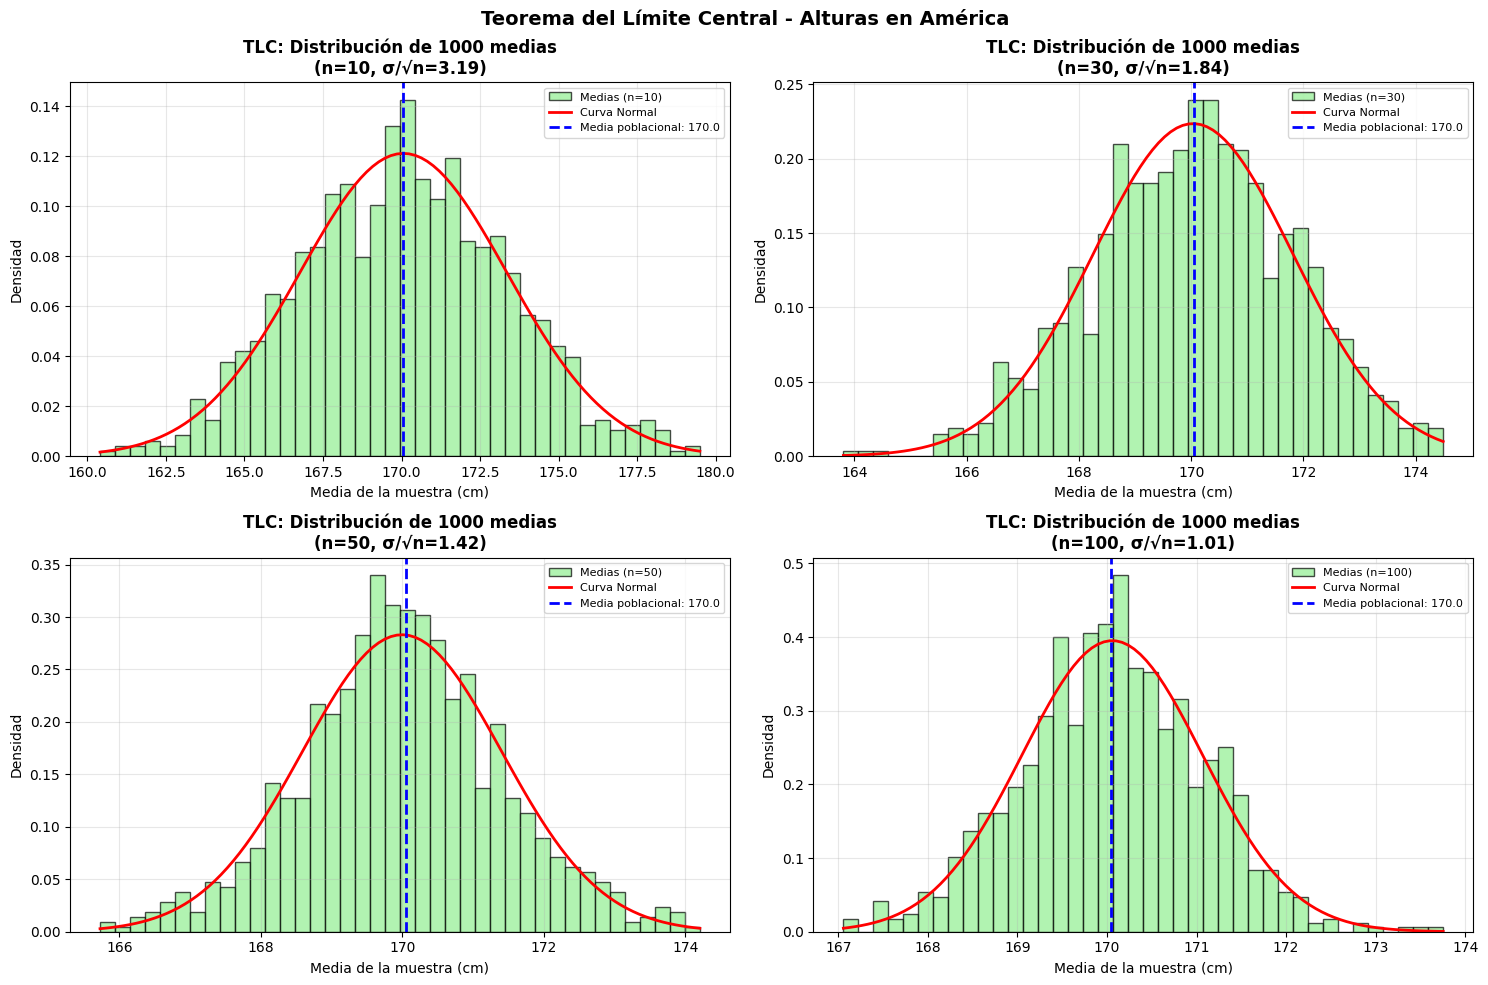


OBSERVACIONES:
✅ A mayor tamaño de muestra (n), la distribución es más estrecha
✅ Todas las distribuciones de medias tienen forma de campana (normal)
✅ La media de las medias ≈ media poblacional real
✅ La desviación estándar de las medias ≈ σ/√n (error estándar)


In [9]:
# Demostración del Teorema del Límite Central con alturas de América

# Tomar 1000 muestras de diferentes tamaños y calcular sus medias
tamaños_muestra = [10, 30, 50, 100]
num_muestras = 1000

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

print("="*70)
print("TEOREMA DEL LÍMITE CENTRAL - Distribución de Medias Muestrales")
print("="*70)

for idx, n in enumerate(tamaños_muestra):
    medias_muestrales = []
    
    # Tomar 1000 muestras y calcular la media de cada una
    for i in range(num_muestras):
        muestra = poblacion_america["altura"].sample(n=n, replace=True)
        medias_muestrales.append(muestra.mean())
    
    medias_muestrales = np.array(medias_muestrales)
    
    # Calcular parámetros de la distribución de medias
    media_de_medias = medias_muestrales.mean()
    std_de_medias = medias_muestrales.std()
    
    # Error estándar teórico: σ / √n
    error_estandar_teorico = std_poblacion_america / np.sqrt(n)
    
    print(f"\nTamaño de muestra n={n}:")
    print(f"  Media de las medias: {media_de_medias:.2f} cm")
    print(f"  Desv. Std de las medias: {std_de_medias:.2f} cm")
    print(f"  Error estándar teórico (σ/√n): {error_estandar_teorico:.2f} cm")
    
    # Visualización
    axes[idx].hist(medias_muestrales, bins=40, density=True, alpha=0.7,
                   color='lightgreen', edgecolor='black', label=f'Medias (n={n})')
    
    # Curva normal teórica para la distribución de medias
    x_medias = np.linspace(medias_muestrales.min(), medias_muestrales.max(), 100)
    curva_medias = stats.norm.pdf(x_medias, media_de_medias, std_de_medias)
    axes[idx].plot(x_medias, curva_medias, 'r-', linewidth=2, label='Curva Normal')
    
    # Marcar la media poblacional real
    axes[idx].axvline(media_poblacion_america, color='blue', linestyle='--', 
                      linewidth=2, label=f'Media poblacional: {media_poblacion_america:.1f}')
    
    axes[idx].set_title(f'TLC: Distribución de {num_muestras} medias\n(n={n}, σ/√n={error_estandar_teorico:.2f})',
                       fontweight='bold')
    axes[idx].set_xlabel('Media de la muestra (cm)')
    axes[idx].set_ylabel('Densidad')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle(f'Teorema del Límite Central - Alturas en {continente_ejemplo}', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OBSERVACIONES:")
print("="*70)
print("✅ A mayor tamaño de muestra (n), la distribución es más estrecha")
print("✅ Todas las distribuciones de medias tienen forma de campana (normal)")
print("✅ La media de las medias ≈ media poblacional real")
print("✅ La desviación estándar de las medias ≈ σ/√n (error estándar)")

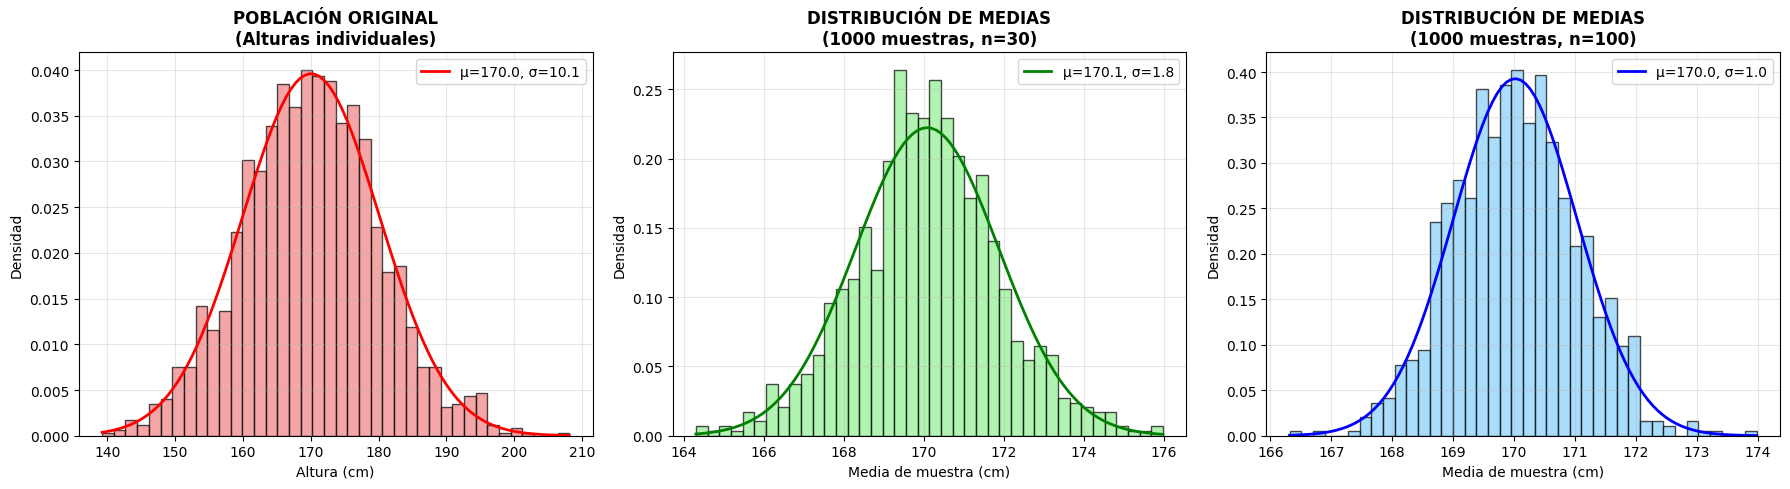

CONCLUSIÓN DEL TLC:
Población original: σ = 10.08 cm
Distribución de medias (n=30): σ = 1.80 cm
Distribución de medias (n=100): σ = 1.02 cm

✅ La distribución de medias es SIEMPRE más estrecha (menos dispersa)
✅ A mayor tamaño de muestra, más concentradas están las medias
✅ Todas mantienen la misma media central (~170 cm)


In [10]:
# Comparación visual: Población original vs Distribución de medias

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Distribución de la población original
axes[0].hist(poblacion_america["altura"], bins=40, density=True, alpha=0.7,
             color='lightcoral', edgecolor='black')
x_pob = np.linspace(poblacion_america["altura"].min(), poblacion_america["altura"].max(), 100)
axes[0].plot(x_pob, stats.norm.pdf(x_pob, media_poblacion_america, std_poblacion_america),
             'r-', linewidth=2, label=f'μ={media_poblacion_america:.1f}, σ={std_poblacion_america:.1f}')
axes[0].set_title('POBLACIÓN ORIGINAL\n(Alturas individuales)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Altura (cm)')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución de medias (n=30)
medias_n30 = [poblacion_america["altura"].sample(n=30, replace=True).mean() for _ in range(1000)]
media_medias = np.mean(medias_n30)
std_medias = np.std(medias_n30)
axes[1].hist(medias_n30, bins=40, density=True, alpha=0.7,
             color='lightgreen', edgecolor='black')
x_medias = np.linspace(min(medias_n30), max(medias_n30), 100)
axes[1].plot(x_medias, stats.norm.pdf(x_medias, media_medias, std_medias),
             'g-', linewidth=2, label=f'μ={media_medias:.1f}, σ={std_medias:.1f}')
axes[1].set_title('DISTRIBUCIÓN DE MEDIAS\n(1000 muestras, n=30)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Media de muestra (cm)')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Distribución de medias (n=100)
medias_n100 = [poblacion_america["altura"].sample(n=100, replace=True).mean() for _ in range(1000)]
media_medias2 = np.mean(medias_n100)
std_medias2 = np.std(medias_n100)
axes[2].hist(medias_n100, bins=40, density=True, alpha=0.7,
             color='lightskyblue', edgecolor='black')
x_medias2 = np.linspace(min(medias_n100), max(medias_n100), 100)
axes[2].plot(x_medias2, stats.norm.pdf(x_medias2, media_medias2, std_medias2),
             'b-', linewidth=2, label=f'μ={media_medias2:.1f}, σ={std_medias2:.1f}')
axes[2].set_title('DISTRIBUCIÓN DE MEDIAS\n(1000 muestras, n=100)', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Media de muestra (cm)')
axes[2].set_ylabel('Densidad')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*70)
print("CONCLUSIÓN DEL TLC:")
print("="*70)
print(f"Población original: σ = {std_poblacion_america:.2f} cm")
print(f"Distribución de medias (n=30): σ = {std_medias:.2f} cm")
print(f"Distribución de medias (n=100): σ = {std_medias2:.2f} cm")
print("\n✅ La distribución de medias es SIEMPRE más estrecha (menos dispersa)")
print("✅ A mayor tamaño de muestra, más concentradas están las medias")
print("✅ Todas mantienen la misma media central (~170 cm)")

# Otras Distribuciones de Probabilidad

Además de la distribución normal, existen otras distribuciones que modelan diferentes tipos de fenómenos. Se dividen en **continuas** y **discretas**.

## Distribuciones Continuas

### Distribución Uniforme
**¿Qué hace?** Modela eventos donde todos los resultados tienen la misma probabilidad de ocurrir.

**Contexto de uso:** Simulaciones de números aleatorios, selección aleatoria de valores en un rango, modelado de eventos equiprobables.

**Ejemplo:** Generar un número aleatorio entre 0 y 10 donde cualquier valor tiene la misma probabilidad.

### Distribución Chi-cuadrado (χ²)
**¿Qué hace?** Distribución con k grados de libertad que converge a la normal cuando k es grande. Mide la suma de variables normales al cuadrado.

**Contexto de uso:** Tests de bondad de ajuste, pruebas de independencia entre variables categóricas, análisis de varianza.

**Ejemplo:** Verificar si una moneda está sesgada comparando frecuencias observadas vs esperadas de caras/cruces.

### Distribución Exponencial
**¿Qué hace?** Modela el tiempo entre eventos que ocurren de forma continua e independiente.

**Contexto de uso:** Tiempo de espera entre llegadas (clientes, llamadas), tiempo hasta falla de componentes, duración de procesos.

**Ejemplo:** Tiempo entre llegadas de clientes a un cajero automático, vida útil de componentes electrónicos.

### Distribución t de Student
**¿Qué hace?** Similar a la normal pero con colas más pesadas. Se usa cuando el tamaño de muestra es pequeño y la desviación estándar poblacional es desconocida.

**Contexto de uso:** Intervalos de confianza con muestras pequeñas (n < 30), tests de hipótesis con varianza desconocida.

**Ejemplo:** Estimar la altura media de una población con solo 15 mediciones.

## Distribuciones Discretas

### Distribución de Bernoulli
**¿Qué hace?** Modela un experimento con solo dos resultados posibles (éxito/fracaso) con probabilidad p.

**Contexto de uso:** Lanzamiento de moneda, resultado binario de un evento (aprobado/reprobado, sí/no).

**Ejemplo:** Probabilidad de que un cliente realice una compra (compra/no compra).

### Distribución Binomial
**¿Qué hace?** Generalización de Bernoulli. Modela el número de éxitos en N experimentos independientes, cada uno con probabilidad p.

**Contexto de uso:** Número de clientes que compran en una muestra, número de productos defectuosos en un lote, resultados de encuestas.

**Ejemplo:** De 100 correos enviados, ¿cuántos serán abiertos si la probabilidad de apertura es 20%?

### Distribución de Poisson
**¿Qué hace?** Modela el número de eventos que ocurren en un intervalo fijo de tiempo/espacio cuando los eventos ocurren con frecuencia constante e independiente.

**Contexto de uso:** Número de llamadas por hora, errores por página, accidentes por mes, visitas a un sitio web por minuto.

**Ejemplo:** Número de clientes que llegan a una tienda en una hora, número de errores de servidor por día.


# Correlación y Covarianza

La **correlación** mide la relación lineal entre dos variables. La **covarianza** mide cómo varían dos variables juntas respecto a sus medias.

**Coeficiente de Pearson:** Valor entre -1 y 1 que indica la fuerza y dirección de la relación lineal.
- **+1:** Correlación positiva perfecta (cuando una crece, la otra también)
- **0:** No hay correlación lineal
- **-1:** Correlación negativa perfecta (cuando una crece, la otra decrece)

In [ ]:
# Extender el dataset agregando PESO correlacionado con la altura
# Fórmula aproximada: peso (kg) ≈ (altura (cm) - 100) + variación por continente

np.random.seed(42)

# Generar peso basado en altura con correlación realista
# Peso base ≈ altura - 100, con variación aleatoria
peso_base = poblacion["altura"] - 100

# Agregar variación realista y ajustes por continente
variacion = np.random.normal(0, 8, size=len(poblacion))

# Pequeños ajustes promedio por continente 
ajustes_continente = {
    "América": 2,
    "Europa": 0,
    "Asia": -3,
    "África": -2,
    "Oceanía": 3
}

poblacion["peso"] = peso_base + variacion
poblacion["peso"] = poblacion.apply(
    lambda row: row["peso"] + ajustes_continente[row["continente"]], axis=1
)

# Calcular IMC = peso(kg) / (altura(m))^2
poblacion["imc"] = poblacion["peso"] / ((poblacion["altura"] / 100) ** 2)

print("="*60)
print("DATASET EXTENDIDO CON PESO E IMC")
print("="*60)
print(poblacion.head(10))
print(f"\nTotal de registros: {len(poblacion)}")
print(f"\nEstadísticas del peso:")
print(poblacion["peso"].describe())
print(f"\nEstadísticas del IMC:")
print(poblacion["imc"].describe())

DATASET EXTENDIDO CON PESO E IMC
  continente  edad      altura        peso        imc
0    Oceanía    30  151.306023   58.279736  25.456878
1       Asia    24  162.468650   58.362536  22.110319
2    América    24  161.795307   68.976815  26.349434
3     Europa    20  188.705998  100.890237  28.332033
4     África    24  162.458488   58.585261  22.197474
5    América    23  160.780669   60.907573  23.561538
6     Europa    24  177.870929   90.504632  28.606245
7    Oceanía    28  180.732247   89.871725  27.513876
8       Asia    20  165.972055   59.216260  21.496662
9       Asia    25  176.218022   77.558502  24.976338

Total de registros: 10000

Estadísticas del peso:
count    10000.000000
mean        69.977141
std         13.045324
min         18.135698
25%         61.242660
50%         69.861598
75%         78.817391
max        116.633763
Name: peso, dtype: float64

Estadísticas del IMC:
count    10000.000000
mean        24.060247
std          3.020346
min          9.213054
25%     

In [ ]:
# Matriz de Correlación entre Altura, Peso e IMC

# Calcular correlaciones
matriz_correlacion = poblacion[["altura", "peso", "imc"]].corr()

print("="*60)
print("MATRIZ DE CORRELACIÓN (Coeficiente de Pearson)")
print("="*60)
print(matriz_correlacion)
print("\n" + "="*60)
print("INTERPRETACIÓN:")
print("="*60)
print(f"Correlación altura-peso: {matriz_correlacion.loc['altura', 'peso']:.4f}")
print(f"Correlación altura-IMC: {matriz_correlacion.loc['altura', 'imc']:.4f}")
print(f"Correlación peso-IMC: {matriz_correlacion.loc['peso', 'imc']:.4f}")

# Visualización con heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(matriz_correlacion, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Etiquetas
ax.set_xticks(np.arange(len(matriz_correlacion.columns)))
ax.set_yticks(np.arange(len(matriz_correlacion.columns)))
ax.set_xticklabels(matriz_correlacion.columns, fontsize=12)
ax.set_yticklabels(matriz_correlacion.columns, fontsize=12)

# Valores en las celdas
for i in range(len(matriz_correlacion)):
    for j in range(len(matriz_correlacion.columns)):
        text = ax.text(j, i, f'{matriz_correlacion.iloc[i, j]:.3f}',
                      ha="center", va="center", color="black", fontsize=12, fontweight='bold')

# Barra de color
plt.colorbar(im, ax=ax, label='Correlación')
ax.set_title('Matriz de Correlación: Altura, Peso e IMC', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Altura y peso tienen correlación positiva fuerte (~0.7-0.8)")
print("✅ IMC correlaciona más con peso que con altura (lógico: IMC = peso/altura²)")

In [ ]:
# Matriz de Covarianza entre Altura, Peso e IMC

# Calcular covarianza
matriz_covarianza = poblacion[["altura", "peso", "imc"]].cov()

print("="*60)
print("MATRIZ DE COVARIANZA")
print("="*60)
print(matriz_covarianza)
print("\n" + "="*60)
print("DIFERENCIA: CORRELACIÓN vs COVARIANZA")
print("="*60)
print("La CORRELACIÓN está normalizada (-1 a 1), independiente de las unidades")
print("La COVARIANZA depende de las escalas de las variables (valores más grandes)")
print("\n✅ Covarianza positiva: Variables crecen juntas")
print("✅ Covarianza negativa: Cuando una crece, la otra decrece")
print("✅ Covarianza ≈ 0: Variables independientes")

# Visualización de la relación altura-peso
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Scatter plot altura vs peso
axes[0].scatter(poblacion["altura"], poblacion["peso"], alpha=0.3, s=20, color='blue')
axes[0].set_xlabel('Altura (cm)', fontsize=12)
axes[0].set_ylabel('Peso (kg)', fontsize=12)
axes[0].set_title('Relación Altura vs Peso\n(Correlación positiva visible)', 
                  fontweight='bold', fontsize=13)
axes[0].grid(True, alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(poblacion["altura"], poblacion["peso"], 1)
p = np.poly1d(z)
axes[0].plot(poblacion["altura"].sort_values(), 
             p(poblacion["altura"].sort_values()), 
             "r-", linewidth=2, label=f'Tendencia: y = {z[0]:.2f}x + {z[1]:.2f}')
axes[0].legend()

# Gráfico 2: Scatter plot altura vs IMC
axes[1].scatter(poblacion["altura"], poblacion["imc"], alpha=0.3, s=20, color='green')
axes[1].set_xlabel('Altura (cm)', fontsize=12)
axes[1].set_ylabel('IMC (kg/m²)', fontsize=12)
axes[1].set_title('Relación Altura vs IMC\n(Correlación débil/negativa)', 
                  fontweight='bold', fontsize=13)
axes[1].grid(True, alpha=0.3)

# Línea de referencia IMC saludable
axes[1].axhline(y=18.5, color='orange', linestyle='--', linewidth=1, label='Bajo peso')
axes[1].axhline(y=25, color='red', linestyle='--', linewidth=1, label='Sobrepeso')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Análisis de IMC por Continente

print("="*70)
print("ANÁLISIS DE IMC (Índice de Masa Corporal) POR CONTINENTE")
print("="*70)
print("\nCategorías de IMC (OMS):")
print("  < 18.5: Bajo peso")
print("  18.5 - 24.9: Normal")
print("  25.0 - 29.9: Sobrepeso")
print("  ≥ 30.0: Obesidad")
print("\n" + "="*70)

# Estadísticas por continente
for continente in continentes:
    datos_cont = poblacion[poblacion["continente"] == continente]
    imc_medio = datos_cont["imc"].mean()
    imc_std = datos_cont["imc"].std()
    altura_media = datos_cont["altura"].mean()
    peso_medio = datos_cont["peso"].mean()
    
    print(f"\n{continente}:")
    print(f"  Altura media: {altura_media:.2f} cm")
    print(f"  Peso medio: {peso_medio:.2f} kg")
    print(f"  IMC medio: {imc_medio:.2f} ± {imc_std:.2f}")
    
    # Clasificación promedio
    if imc_medio < 18.5:
        categoria = "Bajo peso"
    elif imc_medio < 25:
        categoria = "Normal ✅"
    elif imc_medio < 30:
        categoria = "Sobrepeso"
    else:
        categoria = "Obesidad"
    print(f"  Categoría promedio: {categoria}")

# Visualización: Distribución de IMC por continente
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, continente in enumerate(continentes):
    datos_cont = poblacion[poblacion["continente"] == continente]
    
    # Histograma
    axes[i].hist(datos_cont["imc"], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    
    # Líneas de referencia
    axes[i].axvline(18.5, color='orange', linestyle='--', linewidth=2, alpha=0.7)
    axes[i].axvline(25, color='red', linestyle='--', linewidth=2, alpha=0.7)
    axes[i].axvline(30, color='darkred', linestyle='--', linewidth=2, alpha=0.7)
    
    # Media del continente
    imc_medio = datos_cont["imc"].mean()
    axes[i].axvline(imc_medio, color='green', linestyle='-', linewidth=2.5, 
                    label=f'Media: {imc_medio:.2f}')
    
    axes[i].set_title(f'{continente}\nIMC medio: {imc_medio:.2f}', fontweight='bold')
    axes[i].set_xlabel('IMC (kg/m²)')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

# Ocultar subplot vacío
axes[5].axis('off')

plt.suptitle('Distribución de IMC por Continente\n(Líneas: naranja=18.5, roja=25, rojo oscuro=30)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CONCLUSIONES:")
print("="*70)
print("✅ La mayoría de la población tiene IMC en rango normal (18.5-25)")
print("✅ Existen diferencias leves entre continentes debido a variación altura-peso")
print("✅ La correlación altura-peso se refleja en IMC relativamente estable")

# Pruebas de Hipótesis

Una prueba de hipótesis es un método estadístico para tomar decisiones sobre una población basándose en datos de muestra.

## Componentes Principales:
1. **Hipótesis Nula (H₀)**: La afirmación que asumimos verdadera por defecto
2. **Hipótesis Alternativa (H₁ o Hₐ)**: La afirmación que queremos probar
3. **Nivel de Significancia (α)**: Probabilidad de rechazar H₀ cuando es verdadera (error tipo I)
4. **Valor p**: Probabilidad de obtener resultados tan extremos como los observados, asumiendo que H₀ es verdadera

## Tipos de Pruebas:
- **Prueba de una cola**: Dirección específica (mayor que o menor que)
- **Prueba de dos colas**: Cualquier diferencia (diferente de)

In [1]:
# Ejemplo Práctico: Prueba de Hipótesis
# ¿Es el IMC promedio de América significativamente diferente del valor recomendado (IMC = 22)?

# Datos de América
america_data = poblacion[poblacion["continente"] == "América"]["imc"]

# Parámetros
valor_referencia = 22  # IMC recomendado
nivel_significancia = 0.05  # α = 5%

# Realizar prueba t de Student
t_stat, p_valor = stats.ttest_1samp(america_data, valor_referencia)

print("="*70)
print("PRUEBA DE HIPÓTESIS: IMC en América")
print("="*70)
print("\nHipótesis:")
print("H₀: El IMC promedio en América = 22")
print("H₁: El IMC promedio en América ≠ 22")
print(f"\nNivel de significancia (α): {nivel_significancia}")
print(f"Valor p: {p_valor:.4f}")

# Decisión
if p_valor < nivel_significancia:
    print("\n❌ Se rechaza H₀")
    print(f"Hay evidencia estadística para decir que el IMC promedio en América es diferente de {valor_referencia}")
else:
    print("\n✅ No se rechaza H₀")
    print(f"No hay evidencia suficiente para decir que el IMC promedio en América es diferente de {valor_referencia}")

# Visualización
plt.figure(figsize=(12, 6))

# Histograma de los datos
plt.hist(america_data, bins=30, density=True, alpha=0.6, color='skyblue', label='Datos observados')

# Curva normal de los datos
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, america_data.mean(), america_data.std()), 
         'b-', lw=2, label='Distribución muestral')

# Valor de referencia
plt.axvline(valor_referencia, color='red', linestyle='--', 
            label=f'Valor de referencia (IMC = {valor_referencia})')

plt.title('Distribución del IMC en América\ncon valor de referencia', fontsize=12, fontweight='bold')
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Estadísticas adicionales
print("\n" + "="*70)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print(f"Media muestral: {america_data.mean():.2f}")
print(f"Desviación estándar: {america_data.std():.2f}")
print(f"Tamaño de muestra: {len(america_data)}")
print(f"Error estándar: {stats.sem(america_data):.2f}")

# Intervalo de confianza
ic = stats.t.interval(0.95, len(america_data)-1, 
                     loc=america_data.mean(), 
                     scale=stats.sem(america_data))
print(f"\nIntervalo de confianza del 95%: ({ic[0]:.2f}, {ic[1]:.2f})")

NameError: name 'poblacion' is not defined

# Regresión Lineal

La regresión lineal es una técnica estadística para modelar la relación entre una variable dependiente (y) y una o más variables independientes (x).

## Componentes Principales:
1. **Variable Dependiente (y)**: La variable que queremos predecir
2. **Variable(s) Independiente(s) (x)**: Las variables que usamos para hacer la predicción
3. **Coeficientes (β)**: Los parámetros que definen la relación lineal
4. **R²**: Coeficiente de determinación que mide la bondad del ajuste

## Fórmula:
y = β₀ + β₁x + ε

Donde:
- β₀: Intercepto (valor de y cuando x = 0)
- β₁: Pendiente (cambio en y por unidad de cambio en x)
- ε: Error aleatorio

In [ ]:
# Ejemplo Práctico: Regresión Lineal
# Predecir el peso basado en la altura

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Preparar los datos
X = poblacion[["altura"]]  # Variable independiente
y = poblacion["peso"]      # Variable dependiente

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

print("="*70)
print("REGRESIÓN LINEAL: Predicción de Peso basado en Altura")
print("="*70)
print("\nEcuación del modelo:")
print(f"Peso = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f} × Altura")
print("\nInterpretación:")
print(f"- Por cada cm de altura, el peso aumenta en promedio {modelo.coef_[0]:.2f} kg")
print(f"- Para una altura de 0 cm (teórico), el peso sería {modelo.intercept_:.2f} kg")

# Métricas de rendimiento
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*70)
print("MÉTRICAS DE RENDIMIENTO")
print("="*70)
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Error cuadrático medio (RMSE): {rmse:.2f} kg")

# Visualización
plt.figure(figsize=(12, 6))

# Datos reales
plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Datos reales')

# Línea de regresión
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')

plt.title('Regresión Lineal: Peso vs Altura', fontsize=12, fontweight='bold')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Análisis de residuos
residuos = y_test - y_pred

plt.figure(figsize=(12, 5))

# Gráfico de residuos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuos', fontweight='bold')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.grid(True, alpha=0.3)

# Distribución de residuos
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Residuos', fontweight='bold')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANÁLISIS DE RESIDUOS")
print("="*70)
print("Los residuos nos muestran qué tan lejos están las predicciones de los valores reales")
print(f"Media de residuos: {residuos.mean():.2f}")
print(f"Desviación estándar de residuos: {residuos.std():.2f}")

# Predicciones de ejemplo
alturas_ejemplo = np.array([[160], [170], [180], [190]])
predicciones = modelo.predict(alturas_ejemplo)

print("\n" + "="*70)
print("EJEMPLOS DE PREDICCIÓN")
print("="*70)
for altura, peso_pred in zip(alturas_ejemplo.flatten(), predicciones):
    print(f"Para una altura de {altura} cm, el peso predicho es {peso_pred:.1f} kg")